# Neural & Behavioral Modeling - Week 14 (Exercises)
by Ting-Yu, Lin (tylin.amice@gmail.com)

In [1]:
# Upgrade PyTorch to 0.4.0 if necessary:
! conda install -y pytorch-cpu torchvision-cpu -c pytorch

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - pytorch-cpu
  - torchvision-cpu

Current channels:

  - https://conda.anaconda.org/pytorch/osx-64
  - https://conda.anaconda.org/pytorch/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/osx-64
  - https://repo.anaconda.com/pkgs/pro/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [57]:
%config IPCompleter.greedy=True 
%matplotlib inline
#from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from IPython.display import *
import numpy as np

In [51]:
# Check GPU status:
import torch as t
t.manual_seed(1)    # for reproduction
print('PyTorch version:',t.__version__)
use_cuda=t.cuda.is_available()
if(use_cuda):
    for i in range(t.cuda.device_count()):
        print('Device ',i,':',t.cuda.get_device_name(i))
    print('Current: Device ',t.cuda.current_device())
    t.backends.cudnn.benchmark = True 
    device = t.device("cuda")
else:
    device = t.device("cpu")
    print('No GPU')

PyTorch version: 0.4.0
No GPU


## 1 Activation/Signal Function in RNN (10 points)

tanh(x) is a more popular choice of activation function than sigmoid(x) & relu(x) in contemporary RNNs.
Below please use simple RNN to compare 3 activation functions in terms of their learning efficiency and capacity. If there is any significant difference, please discuss why. 

nn.RNN(..., nonlinearity='relu') allows you to switch tanh to relu. However, you need some deep hacking of the source code to replace nn.Tanh with nn.Sigmoid. Alternatively, you can <a href="https://www.cpuheater.com/deep-learning/introduction-to-recurrent-neural-networks-in-pytorch/">code a simple RNN from scratch</a> to have a better control of everything!

### 1.0 Data: sin(t) → cos(t)

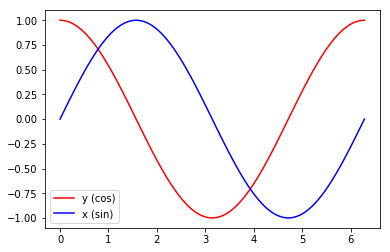

In [58]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plot(steps, y_np, 'r-', label='y (cos)')
plot(steps, x_np, 'b-', label='x (sin)')
plt.legend(loc='best');

### 1.1 RNN model for 1D-to-1D time-series regression (7 points)

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init

In [12]:
dtype = torch.FloatTensor
input_size, hidden_size, output_size = 7, 6, 1
epochs = 300
seq_length = 20
lr = 0.1

In [13]:
data_time_steps = np.linspace(2, 10, seq_length + 1) #why plus 1
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))
 
x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False) #without last one
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False) #witout first one

In [14]:
w1 = torch.FloatTensor(input_size, hidden_size).type(dtype)
init.normal(w1, 0.0, 0.4)
w1 =  Variable(w1, requires_grad=True)
w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal(w2, 0.0, 0.3)
w2 = Variable(w2, requires_grad=True)

/raid/opt/hpc/anaconda/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  
/raid/opt/hpc/anaconda/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  """


In [15]:
def forward(input, context_state, w1, w2):
    xh = torch.cat((input, context_state), 1) #dim = 1(?)
    #context_state = torch.tanh(xh.mm(w1)) #.mm -> inner product
    context_state = torch.sigmoid(xh.mm(w1))
    #context_state = torch.relu(xh.mm(w1))
        
    out = context_state.mm(w2)
    return  (out, context_state)

/raid/opt/hpc/anaconda/python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 0 loss 4.732597827911377
Epoch: 10 loss 1.431702733039856
Epoch: 20 loss 0.8864368200302124
Epoch: 30 loss 0.7514271140098572
Epoch: 40 loss 0.6591578722000122
Epoch: 50 loss 0.5817722082138062
Epoch: 60 loss 0.5144298672676086
Epoch: 70 loss 0.454766184091568
Epoch: 80 loss 0.4012821912765503
Epoch: 90 loss 0.3530259132385254
Epoch: 100 loss 0.3093990683555603
Epoch: 110 loss 0.2700136601924896
Epoch: 120 loss 0.23459337651729584
Epoch: 130 loss 0.20290610194206238
Epoch: 140 loss 0.1747312843799591
Epoch: 150 loss 0.14984214305877686
Epoch: 160 loss 0.1279982477426529
Epoch: 170 loss 0.10895024240016937
Epoch: 180 loss 0.09244377166032791
Epoch: 190 loss 0.07822484523057938
Epoch: 200 loss 0.06604659557342529
Epoch: 210 loss 0.05567522346973419
Epoch: 220 loss 0.046891383826732635
Epoch: 230 loss 0.03949429839849472
Epoch: 240 loss 0.033302418887615204
Epoch: 250 loss 0.028153859078884125
Epoch: 260 loss 0.023905780166387558
Epoch: 270 loss 0.020433718338608742
Epoch: 280 loss

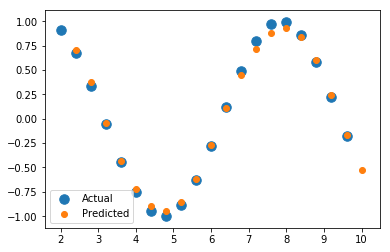

In [16]:
for i in range(epochs):
    total_loss = 0
    context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=True)
    for j in range(x.size(0)):
        input = x[j:(j+1)]
        target = y[j:(j+1)]
        (pred, context_state) = forward(input, context_state, w1, w2)
        loss = (pred - target).pow(2).sum()/2
        total_loss += loss
        loss.backward()
        w1.data -= lr * w1.grad.data
        w2.data -= lr * w2.grad.data
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        context_state = Variable(context_state.data)
    if i % 10 == 0:
        print("Epoch: {} loss {}".format(i, total_loss.data[0]))


context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=False)
predictions = []
 
for i in range(x.size(0)):
    input = x[i:i+1]
    (pred, context_state) = forward(input, context_state, w1, w2)
    context_state = context_state
    predictions.append(pred.data.numpy().ravel()[0])

pl.scatter(data_time_steps[:-1], x.data.numpy(), s=90, label="Actual")
pl.scatter(data_time_steps[1:], predictions, label="Predicted")
pl.legend()
pl.show()

#### 暫時沒用到

In [59]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)   # optimize all cnn parameters
loss_func = nn.MSELoss()

h_state = None      # for initial hidden state

for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sine to predict cosine
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)

    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])

    prediction, h_state = rnn(x, h_state)   # rnn output
    h_state = h_state.data                  # get rid of the autograd part and retain the data part only
 
    loss = loss_func(prediction, y)         # cross entropy loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    clf() # clear previous figure
    plot(steps, y_np.flatten(), 'r-', label='target')
    plot(steps, prediction.data.numpy().flatten(), 'b-', label='prediction')
    title(loss.item()); legend(loc=9)
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

NameError: name 'rnn' is not defined

### 1.2 Conclusions (3 points)

在這裡所使用的RNN是Elman Recurrent Neural Network，<b>三種activation function表現的好壞是tanh > sigmoid > relu</b>。

Elman RNN的整體流程是將原本的hidden units當成是context(上一次的訊息)，將context和新的input結合起來，一整組當成實際的input。視為sequence時，就會是一個很deep的network。<b>(Figure1)</b>

<img src="http://hpc.psy.ntu.edu.tw/~tylin/HW14_rnn.png" width="300">
<b><div style="text-align: center;">Figure1 示意圖</div></b>


所以選用的activation function對model的影響，可能可以從gradient vanishing的角度來看。原本使用Relu是要解決gradient vanishing導致無法learning long-range dependencies的問題，但在sin、cos的預測中不需要牽涉到前面的太多步，所以反而讓tanh在這個case中表現變是優於其他兩個activation function的。

<img src="http://hpc.psy.ntu.edu.tw/~tylin/HW14.jpg" width="600">